In [11]:
# Import required modules
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt 

In [12]:
# Read everything as a text file
inputFile = "vlp_sample_complex.tpd"
with open(inputFile, 'r') as f:
    lines = f.readlines()
lines = [line.strip() for line in lines] # Just remove end of line everywhere

In [13]:
# Identify Sensitivity Variables (which ones, how many, what values)
sensVarsHeader = "#        Sensitivity Variable  1 :"
sensVarsHeaderIndex = [idx for idx, s in enumerate(lines) if sensVarsHeader in s][0]
sensVarsNumHeader = "# Number of Sensitivity Variables"
sensVarsNumheaderIndex = lines.index(sensVarsNumHeader)
sensVarsNum = int(lines[sensVarsNumheaderIndex + 1])

sensVarsNames = []
for i in range(sensVarsNum):
    sensVarsNames.append(lines[sensVarsHeaderIndex + i].split(":")[1].strip())


sensVarsVals = []
for i in range(sensVarsNum):
    sensVarValHeader = "# Variable " + str(i+1) + " (" + sensVarsNames[i] + ") values"
    sensVarValIndex = lines.index(sensVarValHeader)
    sensVarVal = lines[sensVarValIndex + 1].split(",")
    sensVarsVals.append(sensVarVal)


In [14]:
# Identify Flowrates
ratesHeader = "# Rate Values"
ratesHeaderIndex = lines.index(ratesHeader)
rates = lines[ratesHeaderIndex+1:][0].split(",")
rates = [float(rate) for rate in rates] # Flowrates in MMscfd
ratesNum = len(rates)

sensVarsNames.append("Rate")
sensVarsVals.append(rates)

In [15]:
# Identify Calculated variables (output)
calcVarsHeader = "# Number of Calculated Values (columns)"
calcVarsHeaderIndex = lines.index(calcVarsHeader)
calcVarsNum = int(lines[calcVarsHeaderIndex + 1])
calcVarsNames = lines[calcVarsHeaderIndex+2:calcVarsHeaderIndex+calcVarsNum+2]

In [16]:
# Identify key sections in tpd file
pressHeader = "(Boundary Pressure)"
pressHeaderIndex = [idx for idx, s in enumerate(lines) if pressHeader in s][0]
press = lines[pressHeaderIndex + 1].split(",")
press = [float(pres) for pres in press] # Wellhead pressures in psig
pressNum = len(press)

resultsHeader = "Variable TPD Results"
resultsHeaderIndex = [idx for idx, s in enumerate(lines) if resultsHeader in s][0]

In [17]:
# Build the new columns describing the inputs for each VLP line
temp = list(itertools.product(*sensVarsVals))
vlpColumn = list(itertools.chain(*[["VLP#"+str(i+1)]*20 for i in range(int(len(temp)/ratesNum))]))
temp = pd.DataFrame(temp)
temp.columns = sensVarsNames
temp.insert(0, "VLP_number", vlpColumn)


In [18]:
# Read the main tabular data into a dataframe
data = pd.read_csv(inputFile, sep=",", skiprows=resultsHeaderIndex+1, header=None)

# Set dataframe column names (calculated variables names)
data.columns = calcVarsNames

# Add columns to dataframe
data = pd.concat([temp, data.reindex(temp.index)], axis=1)


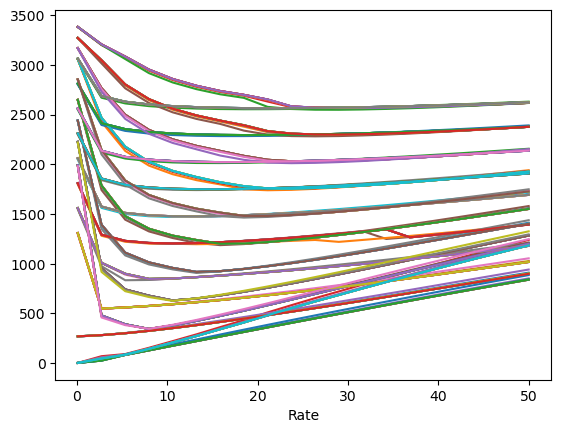

In [23]:
# Plot something...
ax = plt.gca()
for vlp in set(vlpColumn):
    data[data.VLP_number == vlp].plot.line(x='Rate', y='# 5000 - Flowing Bottom Hole Pressure', ax=ax, legend=False)